<a href="https://colab.research.google.com/github/zahidedusgun/MNIST_Digit_Classification/blob/main/MNIST_Digit_Classification_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("mnist.csv")

#print("Columns: ", data.columns)
#print("Data Types: \n", data.dtypes)
#print("Categorical Columns: \n", data.select_dtypes(include=['object']).head())
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
label_zero = 0
label_one = 1

data = pd.concat([data[data["label"] == label_zero],
                  data[data["label"] == label_one]], axis = 0)

print("Data Size: ",data.shape)
data.head()

Data Size:  (8816, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_data = data.drop(["label"],axis=1)
print("X datas' size:", x_data.shape)

y_data = data ["label"]
print("Y datas' size:", y_data.shape)

X datas' size: (8816, 784)
Y datas' size: (8816,)


In [ ]:
image_size = int(np.sqrt(x_data.shape[1]))
image_size

28

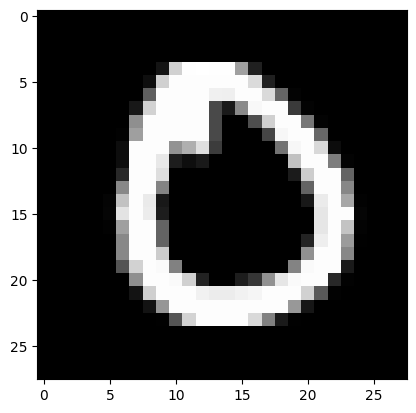

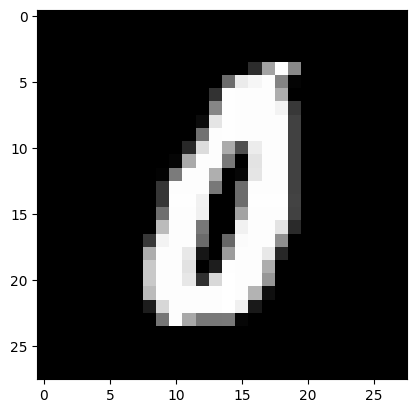

In [ ]:
image1 = x_data.iloc[1483].values
image1 = image1.reshape((image_size, image_size))
plt.imshow(image1,cmap='gray')
plt.show()

image2 = x_data.iloc[1589].values
image2 = image2.reshape((image_size, image_size))
plt.imshow(image2,cmap='gray')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
print("x train:", x_train.shape)
print("x test:", x_test.shape)

print("\n---------------------------\n")
print("After cross validation: \n")

x_train = x_train.T
x_test = x_test.T

y_train = y_train.values.reshape(-1,1).T
y_test = y_test.values.reshape(-1,1).T

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)


x train: (7493, 784)
x test: (1323, 784)

---------------------------

After cross validation: 

x_train:  (784, 7493)
x_test:  (784, 1323)
y_train:  (1, 7493)
y_test:  (1, 1323)


In [ ]:
from scikeras.wrappers import KerasClassifier # importing KerasClassifier from scikeras instead of tensorflow.keras.wrappers.scikit_learn
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

**Classification and Cross-Validation with Keras**

In [ ]:

x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

print(x_train.shape)
print(y_train.shape)

def classifierMethod():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform',
                         activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform',
                         activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform',
                         activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                       metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = classifierMethod,
                                 epochs = 5)
accuracy = cross_val_score(estimator = classifier,
                           X = x_train, y = y_train, cv = 3)# 3lü çarpraz doğrulama
average = accuracy.mean()
variance = accuracy.std()
print("Average Accuracy: "+ str(average))
print("Variance of Accuracy: "+ str(variance))

(7493, 784)
(7493, 1)
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9736 - loss: 0.1644
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9995 - loss: 0.0019
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9989 - loss: 0.0043
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9997 - loss: 0.0011
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9992 - loss: 9.1648e-04
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9547 - loss: 0.2335
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9993 - loss: 0.0032
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9993 - loss: 0.0016
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9992 - loss: 0.0014
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 6.8930e-04
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 